In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo 

from sklearn.metrics import accuracy_score

## aesthetic evaluation dataset

#### load dataset

In [2]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective = aesthetic_evaluation_data['Objective Evaluation']

# get data from author = eduard.bonci
aesthetic_evaluation_data_eduard = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'eduard.bonci']
aesthetic_evaluation_data_eduard_objective = aesthetic_evaluation_data_eduard['Objective Evaluation']
aesthetic_evaluation_data_eduard = aesthetic_evaluation_data_eduard.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_eduard_X = aesthetic_evaluation_data_eduard.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_eduard_y = aesthetic_evaluation_data_eduard['Subjective Evaluation']

# get data from author = cmavioso
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'cmavioso']
aesthetic_evaluation_data_cmavioso_objective = aesthetic_evaluation_data_cmavioso['Objective Evaluation']
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data_cmavioso.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_cmavioso_X = aesthetic_evaluation_data_cmavioso.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_cmavioso_y = aesthetic_evaluation_data_cmavioso['Subjective Evaluation']

# get data from author = mariajoaocardoso
aesthetic_evaluation_data_mariajoaocardoso = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'mariajoaocardoso']
aesthetic_evaluation_data_mariajoaocardoso_objective = aesthetic_evaluation_data_mariajoaocardoso['Objective Evaluation']
aesthetic_evaluation_data_mariajoaocardoso = aesthetic_evaluation_data_mariajoaocardoso.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_mariajoaocardoso_X = aesthetic_evaluation_data_mariajoaocardoso.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_mariajoaocardoso_y = aesthetic_evaluation_data_mariajoaocardoso['Subjective Evaluation']

# get all data
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.029188,0.103340,0.097502,0.009506,0.217169,0.100670,1.503086,0.030362,0.291363,0.210082
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.117875,0.406627,0.305692,0.159653,0.193317,0.061736,1.248600,0.206529,0.351693,0.105346
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.120132,0.206658,0.109386,0.024217,0.280625,0.012974,0.545858,0.075520,0.304185,0.049345
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.156030,0.196133,0.038581,0.032267,0.026153,0.010779,0.334111,0.105626,0.137693,0.031455
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.002820,0.224062,0.021259,0.027071,0.029206,0.006495,0.165401,0.081549,0.091768,0.030546


In [3]:
# number of observations
print(f"Number of observations: {len(aesthetic_evaluation_data)}")

# number of features
print(f"Number of features: {len(aesthetic_evaluation_data.columns)}")

# num of of obs for eduard.bonci
print(f"Number of observations for eduard.bonci: {len(aesthetic_evaluation_data_eduard)}")

# num of of obs for cmavioso
print(f"Number of observations for cmavioso: {len(aesthetic_evaluation_data_cmavioso)}")

# num of of obs for mariajoaocardoso
print(f"Number of observations for mariajoaocardoso: {len(aesthetic_evaluation_data_mariajoaocardoso)}")

Number of observations: 1358
Number of features: 23
Number of observations for eduard.bonci: 494
Number of observations for cmavioso: 237
Number of observations for mariajoaocardoso: 627


In [4]:
# distribution of the target variable
print(aesthetic_evaluation_y.value_counts())

# for eduard.bonci
print("\neduard.bonci target variable distribution:  ", aesthetic_evaluation_data_eduard_y.value_counts())

# for cmavioso
print("\ncmavioso target variable distribution:  ", aesthetic_evaluation_data_cmavioso_y.value_counts())

# for mariajoaocardoso
print("\nmariajoaocardoso target variable distribution:  ", aesthetic_evaluation_data_mariajoaocardoso_y.value_counts())

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

eduard.bonci target variable distribution:   Subjective Evaluation
Good         231
Fair         135
Excellent    106
Poor          22
Name: count, dtype: int64

cmavioso target variable distribution:   Subjective Evaluation
Good         108
Excellent     81
Fair          36
Poor          12
Name: count, dtype: int64

mariajoaocardoso target variable distribution:   Subjective Evaluation
Good         256
Fair         182
Excellent    121
Poor          68
Name: count, dtype: int64


In [5]:
# show proportion of each class
aesthetic_evaluation_y.value_counts(normalize=True)

Subjective Evaluation
Good         0.438144
Fair         0.259941
Excellent    0.226804
Poor         0.075110
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Distribution of Subjective Evaluation')

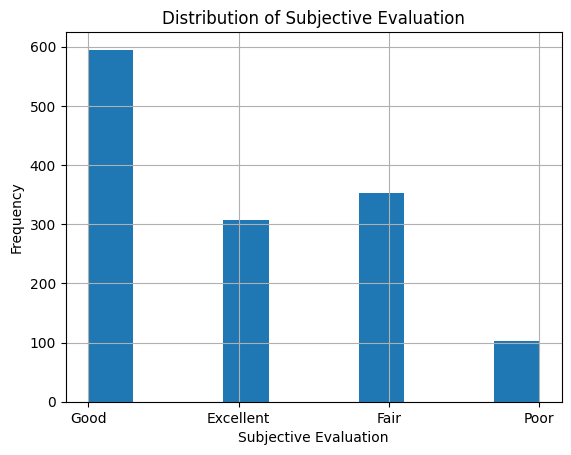

In [6]:
aesthetic_evaluation_y.hist()
plt.xlabel('Subjective Evaluation')
plt.ylabel('Frequency')
plt.title('Distribution of Subjective Evaluation')

In [7]:
# accuracy of 'objective evaluation' relative to target
acc = accuracy_score(aesthetic_evaluation_y, aesthetic_evaluation_objective)
print(f'Accuracy of objective evaluation: {acc}')

# accuracy of 'objective evaluation' relative to target for eduard.bonci
acc_eduard = accuracy_score(aesthetic_evaluation_data_eduard_y, aesthetic_evaluation_data_eduard_objective)
print(f'Accuracy of objective evaluation for eduard.bonci: {acc_eduard}')   

# accuracy of 'objective evaluation' relative to target for cmavioso
acc_cmavioso = accuracy_score(aesthetic_evaluation_data_cmavioso_y, aesthetic_evaluation_data_cmavioso_objective)
print(f'Accuracy of objective evaluation for cmavioso: {acc_cmavioso}') 

# accuracy of 'objective evaluation' relative to target for mariajoaocardoso
acc_mariajoaocardoso = accuracy_score(aesthetic_evaluation_data_mariajoaocardoso_y, aesthetic_evaluation_data_mariajoaocardoso_objective)
print(f'Accuracy of objective evaluation for mariajoaocardoso: {acc_mariajoaocardoso}') 


Accuracy of objective evaluation: 0.5876288659793815
Accuracy of objective evaluation for eduard.bonci: 0.5404858299595142
Accuracy of objective evaluation for cmavioso: 0.679324894514768
Accuracy of objective evaluation for mariajoaocardoso: 0.5901116427432217


In [8]:
# get categorical columns
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")

# do a mapping for the ordinal target variable
mapping = {1: 'Poor', 2: 'Fair', 3: 'Good', 4: 'Excellent'}

K = 4  # number of classes

Categorical columns: []


#### CAIM & 1ook

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
testing parameters: {'C': 1000.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6250007568189386
testing parameters: {'C': 100.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6255517210062664
testing parameters: {'C': 10.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6255502073683892
testing parameters: {'C': 2.5}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6299579208670117
testing parameters: {'C': 1.6666666666666667}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6288544788544789
testing parameters: {'C': 1.1111111111111112}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6283050283050283
testing parameters: {'C': 1.0101010101010102}
  fold  

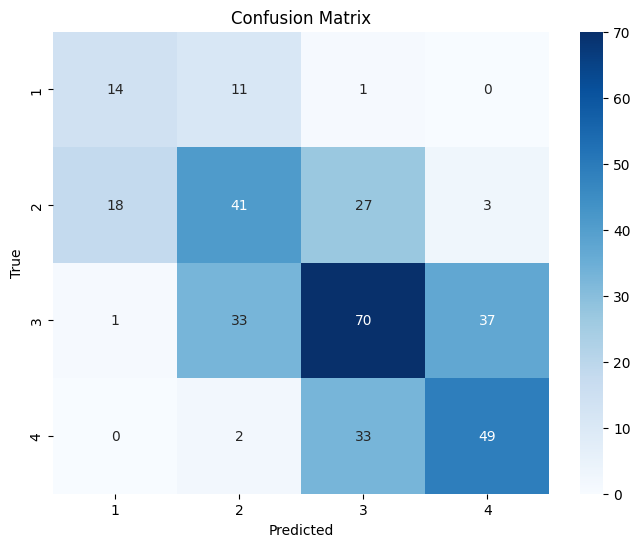

accuracy for class 1: 0.538
accuracy for class 2: 0.461
accuracy for class 3: 0.496
accuracy for class 4: 0.583

Evaluating the model on the train set...
accuracy on train set:  0.6448237885462555
precision on train set:  0.6557423978451721
recall on train set:  0.6448237885462555
f1 score on train set:  0.648405907186321
balanced accuracy on train set:  0.6448237885462555
logistic loss on train set:  0.07665308348656896
mse on train set:  0.44548458149779735

Scorecard table:
          Feature                                       Bin    Points
0       BRA Value   [0.1623383287101974, 1.896475406824211[ -0.006593
1       BRA Value   [1.896475406824211, 3.7108204121868655[  0.498997
2       BRA Value   [3.7108204121868655, 4.254578929780189[  0.311531
3       BRA Value   [4.254578929780189, 24.075530326533293[  0.315480
4       LBC Value  [0.0004087089954772, 0.9968621384151554[  0.284622
..            ...                                       ...       ...
78    cEMDb Value           

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_ml_model, aesthetic_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params={'C': 2.5},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5181681954409227
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5401916265552629
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5732328277782823
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.600220991130082
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6244452517179789
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6376593103865831
testing parameters: {'C': 0.0625}
  fold  1
  fold  

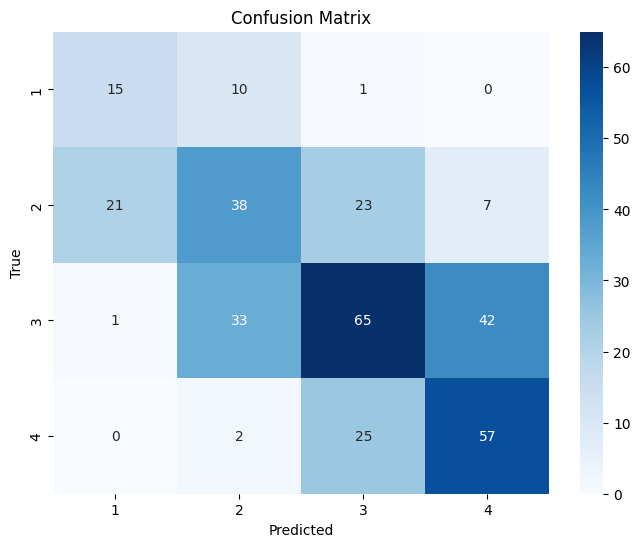

accuracy for class 1: 0.577
accuracy for class 2: 0.427
accuracy for class 3: 0.461
accuracy for class 4: 0.679

Evaluating the model on the train set...
accuracy on train set:  0.6574889867841409
precision on train set:  0.6571030917246128
recall on train set:  0.6574889867841409
f1 score on train set:  0.6545955681128468
balanced accuracy on train set:  0.6574889867841409
logistic loss on train set:  0.07854086201210353
mse on train set:  0.46145374449339205

Scorecard table:
           Feature                                       Bin    Points
0        BRA Value   [0.1623383287101974, 1.896475406824211[ -0.079870
1        BRA Value   [1.896475406824211, 3.7108204121868655[  0.095861
2        BRA Value   [3.7108204121868655, 4.254578929780189[  0.027565
3        BRA Value   [4.254578929780189, 24.075530326533293[ -0.012306
4        BRA Value                 [24.075530326533293, inf[ -0.031250
..             ...                                       ...       ...
98   cEMDLab Value  

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_mm_model, aesthetic_caim_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params={'C': 0.03125},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
Execution time: 49.91354584693909 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           1
1             2           3
2             4           4
3             3           2
4             3           2
..          ...         ...
335           3           2
336           3           3
337           4           3
338           4           3
339           4           4

[340 rows x 2 columns]
accuracy:  0.4970588235294118
precision:  0.5018818405577796
recall:  0.4970588235294118
f1 score:  0.4958508319939437
balanced accuracy:  0.5113670893613519
logistic loss:  0.00861918525111111
mse:  0.6529411764705882
number of far off predictions:  22
number of features:  112
number of non-zero weights:  16
model size (non-zero

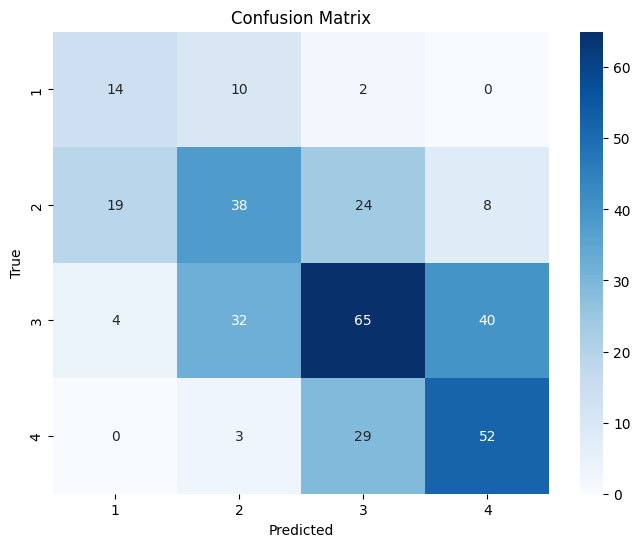

accuracy for class 1: 0.538
accuracy for class 2: 0.427
accuracy for class 3: 0.461
accuracy for class 4: 0.619

Evaluating the model on the train set...
accuracy on train set:  0.6244493392070485
precision on train set:  0.6251226021116079
recall on train set:  0.6244493392070485
f1 score on train set:  0.6221964849592666
balanced accuracy on train set:  0.6244493392070485
logistic loss on train set:  0.07806906173618927
mse on train set:  0.5110132158590308

Scorecard table:
         Feature                                        Bin    Points
0      LBC Value   [0.0004087089954772, 0.9968621384151554[  0.120454
1      LBC Value     [2.555972118011085, 8.815417698806167[ -0.112955
2      BCE Value     [1.391109155180552, 27.26338581203124[ -0.087051
3      BCD Value   [0.0068176080106487, 1.8643352607870796[  0.125549
4      BCD Value    [1.8643352607870796, 3.960910938033588[  0.033530
5     pBRA Value  [0.0079007399895026, 0.05235407732102159[  0.085343
6     pBRA Value  [0.0523540

In [11]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_beyondl1_model, aesthetic_caim_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6211288711288712
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6211288711288712
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6211288711288712
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6211288711288712
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
AdaptiveLasso infeasible: minimize 0.0001147842056932966 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 1.00 0.00]
 ...
 [0.00 0.00 ... 1.00 0.00]
 [0.00 0.00 ... 0.00 

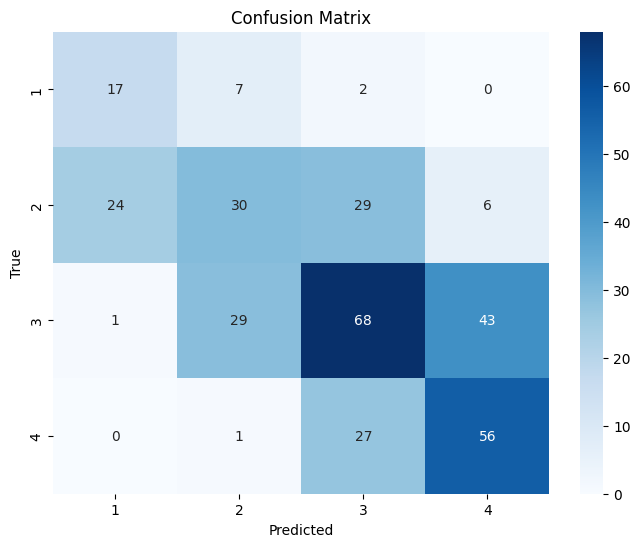

accuracy for class 1: 0.654
accuracy for class 2: 0.337
accuracy for class 3: 0.482
accuracy for class 4: 0.667

Evaluating the model on the train set...
accuracy on train set:  0.6431718061674009
precision on train set:  0.6439015970322597
recall on train set:  0.6431718061674009
f1 score on train set:  0.6392257170673712
balanced accuracy on train set:  0.6431718061674009
logistic loss on train set:  0.07967805760781448
mse on train set:  0.46530837004405284

Scorecard table:
           Feature                                       Bin        Points
0        BRA Value   [0.1623383287101974, 1.896475406824211[  3.165896e-18
1        BRA Value   [1.896475406824211, 3.7108204121868655[  3.604962e-02
2        BRA Value   [3.7108204121868655, 4.254578929780189[ -1.269286e-18
3        BRA Value   [4.254578929780189, 24.075530326533293[ -5.912874e-18
4        BRA Value                 [24.075530326533293, inf[  2.514373e-20
..             ...                                       ...       

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_adaptivelasso_model, aesthetic_caim_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params={'alpha': 0.003593813663804626},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
testing parameters: {'C': 1000.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6244497926316108
testing parameters: {'C': 100.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6255502073683892
testing parameters: {'C': 10.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6249977295431841
testing parameters: {'C': 2.5}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6277540641177005
testing parameters: {'C': 1.6666666666666667}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.623898828444283
testing parameters: {'C': 1.1111111111111112}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6239003420821603
testing parameters: {'C': 1.0101010101010102}
  fold  1

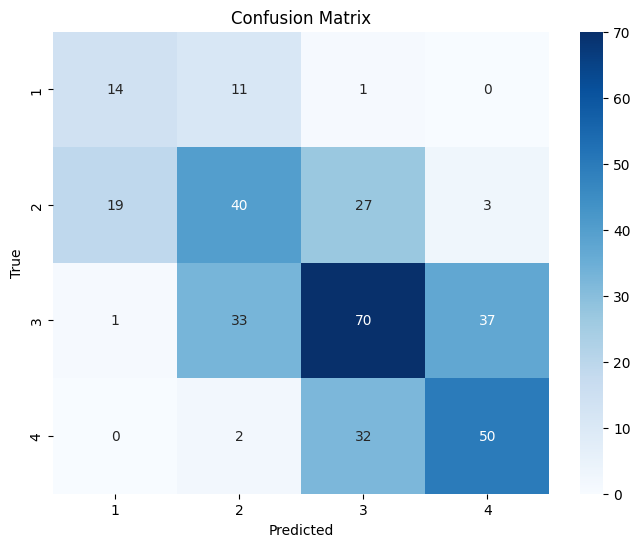

accuracy for class 1: 0.538
accuracy for class 2: 0.449
accuracy for class 3: 0.496
accuracy for class 4: 0.595

Evaluating the model on the train set...
accuracy on train set:  0.6442731277533039
precision on train set:  0.6550248923190328
recall on train set:  0.6442731277533039
f1 score on train set:  0.6479838955321507
balanced accuracy on train set:  0.6442731277533039
logistic loss on train set:  0.07650309081055871
mse on train set:  0.4460352422907489

Scorecard table:
          Feature                                       Bin    Points
0       BRA Value   [0.1623383287101974, 1.896475406824211[  0.446135
1       BRA Value   [1.896475406824211, 3.7108204121868655[  0.509375
2       BRA Value   [3.7108204121868655, 4.254578929780189[ -0.139336
3       LBC Value  [0.0004087089954772, 0.9968621384151554[  0.605975
4       LBC Value  [0.9968621384151554, 1.4529146705382163[  0.162713
..            ...                                       ...       ...
89  cEMDLab Value  [0.001195

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_ml_model, aesthetic_caim_diffcod_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 2.5},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5176157176157177
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5418475463930009
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5704734659280113
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6007659007659008
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6332576514394695
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6387582114854842
testing parameters: {'C': 0.0625}
  fold  1
  fold 

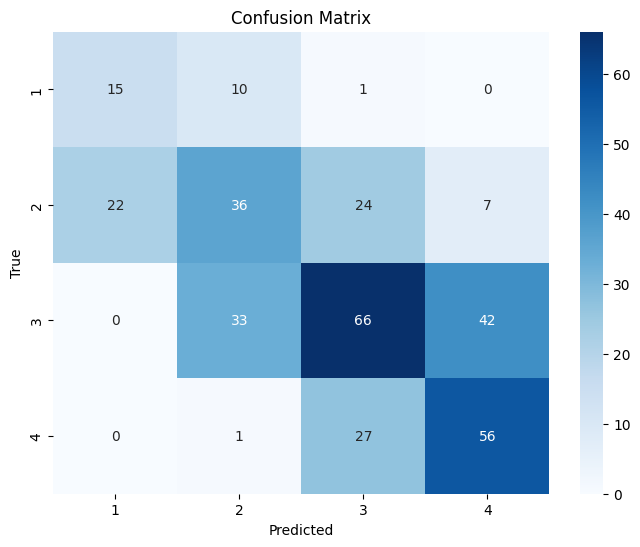

accuracy for class 1: 0.577
accuracy for class 2: 0.404
accuracy for class 3: 0.468
accuracy for class 4: 0.667

Evaluating the model on the train set...
accuracy on train set:  0.6574889867841409
precision on train set:  0.6563409241089158
recall on train set:  0.6574889867841409
f1 score on train set:  0.6543400292537538
balanced accuracy on train set:  0.6574889867841409
logistic loss on train set:  0.07876568705908783
mse on train set:  0.4686123348017621

Scorecard table:
          Feature                                       Bin        Points
0       BRA Value   [0.1623383287101974, 1.896475406824211[ -7.160939e-15
1       BRA Value   [1.896475406824211, 3.7108204121868655[  1.803461e-01
2       BRA Value   [3.7108204121868655, 4.254578929780189[ -5.361183e-02
3       BRA Value   [4.254578929780189, 24.075530326533293[ -8.290210e-03
4       LBC Value  [0.0004087089954772, 0.9968621384151554[ -7.160939e-15
..            ...                                       ...           ...


In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_mm_model, aesthetic_caim_diffcod_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.03125},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
Execution time: 45.06270098686218 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           1
1             2           2
2             4           4
3             3           2
4             3           2
..          ...         ...
335           3           3
336           3           3
337           4           3
338           4           3
339           4           4

[340 rows x 2 columns]
accuracy:  0.4823529411764706
precision:  0.48598750140831726
recall:  0.4823529411764706
f1 score:  0.47793123798742515
balanced accuracy:  0.5279899497267415
logistic loss:  0.012433719814653592
mse:  0.6147058823529412
number of far off predictions:  28
number of features:  112
number of non-zero weights:  13
model size (non-z

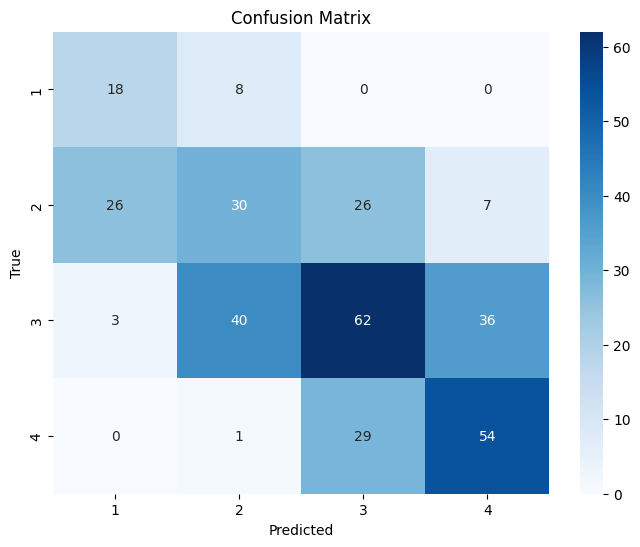

accuracy for class 1: 0.692
accuracy for class 2: 0.337
accuracy for class 3: 0.440
accuracy for class 4: 0.643

Evaluating the model on the train set...
accuracy on train set:  0.6024229074889867
precision on train set:  0.5973242234678546
recall on train set:  0.6024229074889867
f1 score on train set:  0.5980196362135477
balanced accuracy on train set:  0.6024229074889869
logistic loss on train set:  0.07822383110469956
mse on train set:  0.5495594713656388

Scorecard table:
          Feature                                        Bin    Points
0       LBC Value    [1.4529146705382163, 2.555972118011085[ -0.081720
1       BCE Value     [1.391109155180552, 27.26338581203124[ -0.079795
2       BCD Value    [1.8643352607870796, 3.960910938033588[ -0.082891
3       BCD Value    [3.960910938033588, 5.8887017406344375[ -0.102370
4      pLBC Value   [0.0336304635476228, 0.0627216545632178[ -0.119329
5      pUNR Value   [0.0600482936030422, 0.1208379607836962[ -0.075616
6      pUNR Value  [0

In [15]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_beyondl1_model, aesthetic_caim_diffcod_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6222307995035268
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6222307995035268
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6222307995035268
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6222307995035268
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
AdaptiveLasso infeasible: minimize 0.0001147842056932966 @ quad_over_lin([[1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 1.00 0.00]
 ...
 [1.00 1.00 ... 1.00 0.00]
 [1.00 1.00 ... 0.00 

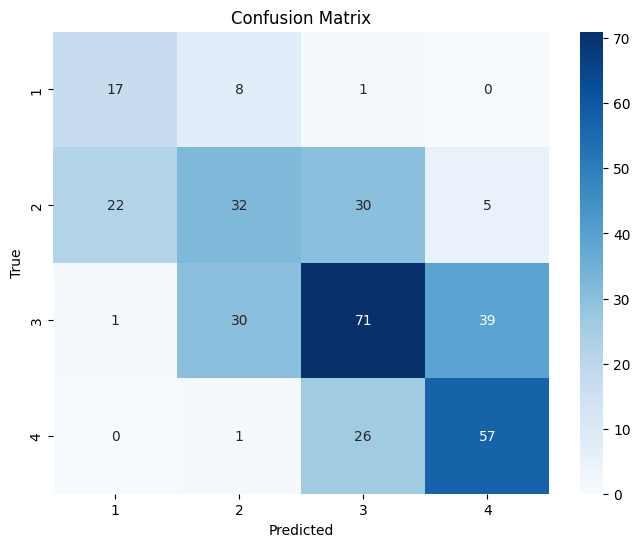

accuracy for class 1: 0.654
accuracy for class 2: 0.360
accuracy for class 3: 0.504
accuracy for class 4: 0.679

Evaluating the model on the train set...
accuracy on train set:  0.6437224669603524
precision on train set:  0.6438535033052907
recall on train set:  0.6437224669603524
f1 score on train set:  0.6405137678062947
balanced accuracy on train set:  0.6437224669603524
logistic loss on train set:  0.07886886397648776
mse on train set:  0.46640969162995594

Scorecard table:
           Feature                                       Bin    Points
0        BRA Value   [0.1623383287101974, 1.896475406824211[  0.054278
1        BRA Value   [1.896475406824211, 3.7108204121868655[  0.052661
2        BRA Value   [3.7108204121868655, 4.254578929780189[ -0.013400
3        BRA Value   [4.254578929780189, 24.075530326533293[ -0.001572
4        BRA Value                 [24.075530326533293, inf[ -0.023214
..             ...                                       ...       ...
105  cEMDLab Value  

In [ ]:
start_time = time.time()

scorecard = Scorecard()

aesthetic_caim_diffcod_adaptivelasso_model, aesthetic_caim_diffcod_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-08},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
testing parameters: {'C': 1000.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.37225350407168584
testing parameters: {'C': 100.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.37334937789483247
testing parameters: {'C': 10.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.35352980352980357
testing parameters: {'C': 2.5}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3722277722277722
testing parameters: {'C': 1.6666666666666667}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3353510126237399
testing parameters: {'C': 1.1111111111111112}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30450609996064537
testing parameters: {'C': 1.0101010101010102}
  fo

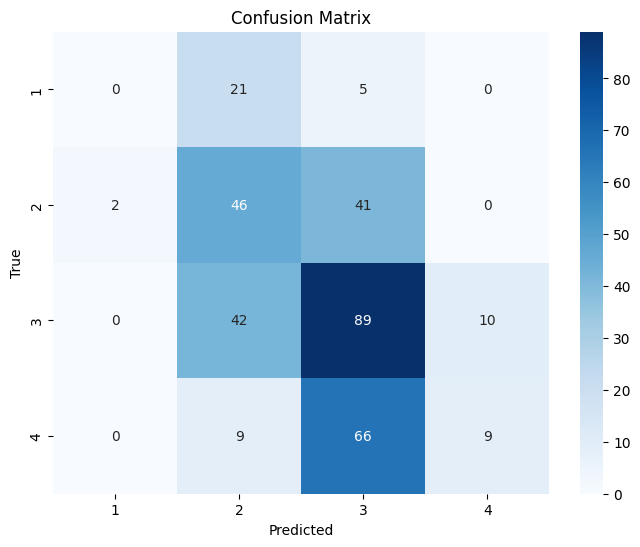

accuracy for class 1: 0.000
accuracy for class 2: 0.517
accuracy for class 3: 0.631
accuracy for class 4: 0.107

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.0828837825402311
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  1.241165
1          BRA Value    [0.189619931322902, 0.20154489666341896[  2.659177
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.077119
3          BRA Value  [0.21413105126949344, 0.21580389681643153[  0.010528
4          BRA Value  [0.27352015369830174, 0.28084376350967144[  0.014669
...              ...                                         ...       ...
27829  cEMDLab Value     [0.7575551495302906, 0.762163126372398[ -1.936287
27830  cE

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_ml_model, aesthetic_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params={'C': 100.0},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.23512548058002603
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.25001362274089545
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.25001362274089545
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.25001362274089545
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2527669300396573
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.32764356855265947
testing parameters: {'C': 0.0625}
  fold  1
  

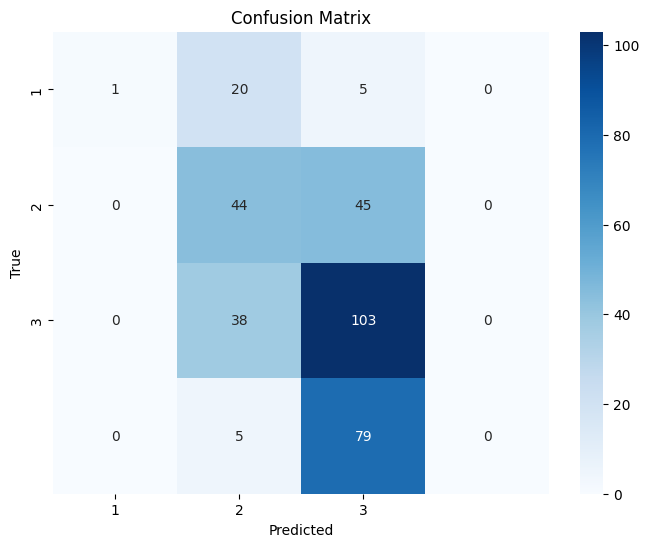

accuracy for class 1: 0.038
accuracy for class 2: 0.494
accuracy for class 3: 0.730
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.0828837825402311
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.136299
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.136309
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.045419
3          BRA Value  [0.20882918670067196, 0.21413105126949344[ -0.045490
4          BRA Value  [0.21413105126949344, 0.21580389681643153[  0.045418
...              ...                                         ...       ...
39925  cEMDLab Value    [0.7899397543211446, 0.8168139941745478[ -0.045486
39926  cE

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_mm_model, aesthetic_infbins_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params={'C': 32},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
Execution time: 4.353293180465698 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           3
1             2           3
2             4           3
3             3           3
4             3           3
..          ...         ...
335           3           3
336           3           3
337           4           3
338           4           3
339           4           3

[340 rows x 2 columns]
accuracy:  0.4147058823529412
precision:  0.1719809688581315
recall:  0.4147058823529412
f1 score:  0.2431331784272961
balanced accuracy:  0.25
logistic loss:  0.0031332937087616445
mse:  0.8147058823529412
number of far off predictions:  4
number of features:  39932
number of non-zero weights:  2
model size (non-zero weights / a

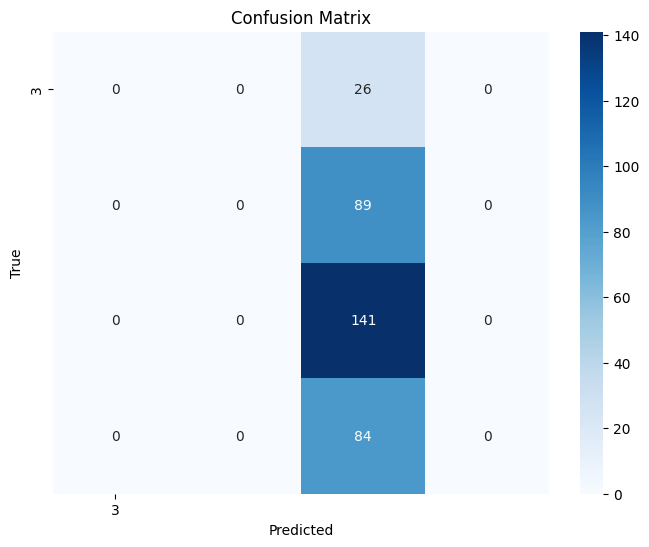

accuracy for class 1: 0.000
accuracy for class 2: 0.000
accuracy for class 3: 1.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.25
precision on train set:  0.0625
recall on train set:  0.25
f1 score on train set:  0.10000000000000002
balanced accuracy on train set:  0.25
logistic loss on train set:  0.01279814577366835
mse on train set:  1.5

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []

SBC columns weights:
               Feature  Weight
39930  featsbcol1-bin1   -0.25
39931  featsbcol2-bin1   -0.50


In [19]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_beyondl1_model, aesthetic_infbins_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
testing parameters: {'alpha': 1e-08}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.41024430115339205
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.41024430115339205
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.41024430115339205
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.41024430115339205
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.43503163503163506
testing parameters: {'alpha': 0.003593813663804626}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.25495262313444134
testing parameters: {'alpha': 0.04641588833612782}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.25000151363787726
testing parameters: {'alpha': 0.5994842503189421}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.25000151363787726
testing parameters: {'alpha': 7.742636826811277}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.25000151363787726
testing parameters: {'alpha': 100.0}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.25000151363787726
best parameters:  {'alpha': 0.0002782559402207126}
best score:  0.43503163503163506


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 4238.461530923843 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           1
1             2           1
2             4           2
3             3           1
4             3           1
..          ...         ...
335           3           2
336           3           2
337           4           2
338           4           2
339           4           2

[340 rows x 2 columns]
accuracy:  0.17352941176470588
precision:  0.4902274858775546
recall:  0.17352941176470588
f1 score:  0.11358966311831149
balanced accuracy:  0.30605843773725677
logistic loss:  0.03582518142150494
mse:  2.2147058823529413
number of far off predictions:  41
number of features:  39932
number of non-zero weights:  39932
model size (non-zero weights / all weights):  1.0


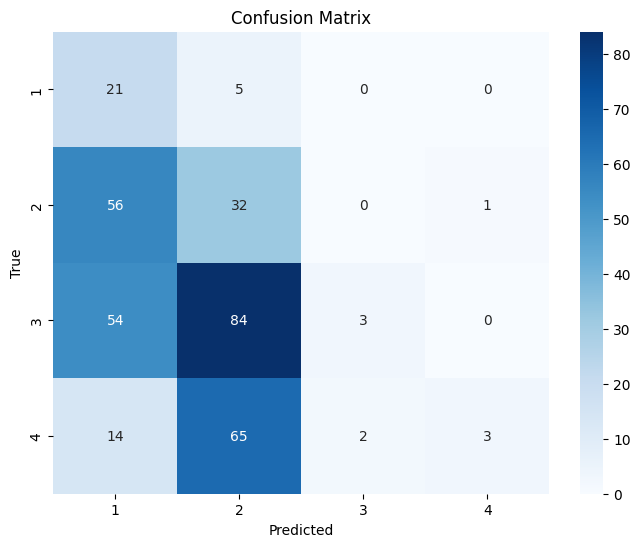

accuracy for class 1: 0.808
accuracy for class 2: 0.360
accuracy for class 3: 0.021
accuracy for class 4: 0.036

Evaluating the model on the train set...
accuracy on train set:  0.5
precision on train set:  0.3333333333333333
recall on train set:  0.5
f1 score on train set:  0.375
balanced accuracy on train set:  0.5
logistic loss on train set:  0.12219429066752646
mse on train set:  1.25

Scorecard table:
             Feature                                         Bin        Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  4.071914e-02
1          BRA Value    [0.189619931322902, 0.20154489666341896[  4.071914e-02
2          BRA Value  [0.20154489666341896, 0.20882918670067196[ -5.525962e-09
3          BRA Value  [0.20882918670067196, 0.21413105126949344[ -1.175195e-10
4          BRA Value  [0.21413105126949344, 0.21580389681643153[ -5.525962e-09
...              ...                                         ...           ...
39925  cEMDLab Value    [0.7899397543

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_adaptivelasso_model, aesthetic_infbins_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params={'alpha': 0.0002782559402207126},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
testing parameters: {'C': 1000.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5765567765567765
testing parameters: {'C': 100.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5792994883903975
testing parameters: {'C': 10.0}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5925120334211244
testing parameters: {'C': 2.5}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5958269003723549
testing parameters: {'C': 1.6666666666666667}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5996791087700178
testing parameters: {'C': 1.1111111111111112}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6057321466412375
testing parameters: {'C': 1.0101010101010102}
  fold  

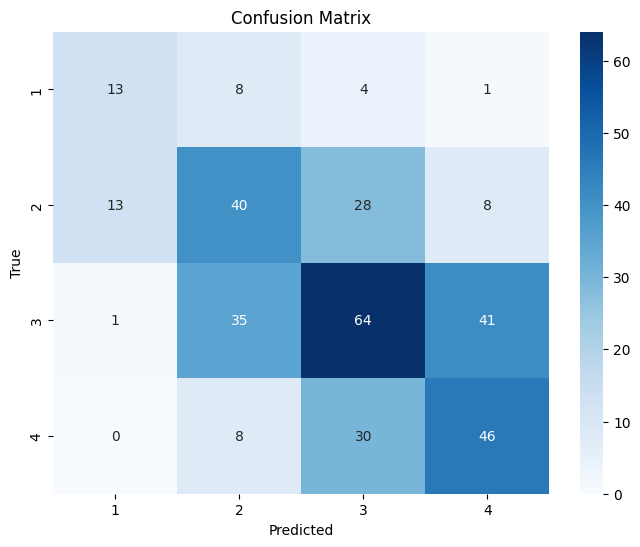

accuracy for class 1: 0.500
accuracy for class 2: 0.449
accuracy for class 3: 0.454
accuracy for class 4: 0.548

Evaluating the model on the train set...
accuracy on train set:  0.9752202643171806
precision on train set:  0.9753507298495949
recall on train set:  0.9752202643171806
f1 score on train set:  0.9752589799521351
balanced accuracy on train set:  0.9752202643171806
logistic loss on train set:  0.08201705788915095
mse on train set:  0.02477973568281938

Scorecard table:
            Feature                                         Bin    Points
0         BRA Value    [0.17135143897882216, 0.189619931322902[  0.030804
1         BRA Value  [0.23356299924095925, 0.25998993666774833[  0.003894
2         BRA Value  [0.25998993666774833, 0.26979525183184316[  0.095580
3         BRA Value  [0.26979525183184316, 0.27352015369830174[  0.009713
4         BRA Value   [0.44161193606901394, 0.4444553868713025[ -0.020886
...             ...                                         ...       ...

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_ml_model, aesthetic_infbins_diffcod_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1.0101010101010102},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
testing parameters: {'C': 0.0009765625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5121045621045621
testing parameters: {'C': 0.001953125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5468031968031968
testing parameters: {'C': 0.00390625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5721475494202768
testing parameters: {'C': 0.0078125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5848000484364121
testing parameters: {'C': 0.015625}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5759906759906761
testing parameters: {'C': 0.03125}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5671964399237127
testing parameters: {'C': 0.0625}
  fold  1
  fold 

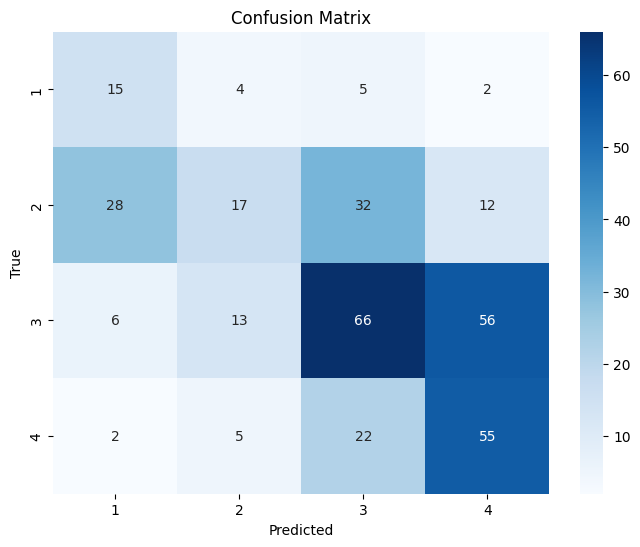

accuracy for class 1: 0.577
accuracy for class 2: 0.191
accuracy for class 3: 0.468
accuracy for class 4: 0.655

Evaluating the model on the train set...
accuracy on train set:  0.7940528634361234
precision on train set:  0.8486437307753654
recall on train set:  0.7940528634361234
f1 score on train set:  0.7492324994971905
balanced accuracy on train set:  0.7940528634361234
logistic loss on train set:  0.08863387906743496
mse on train set:  0.20594713656387664

Scorecard table:
             Feature                                         Bin        Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[ -1.330793e-14
1          BRA Value    [0.189619931322902, 0.20154489666341896[ -1.330793e-14
2          BRA Value  [0.20154489666341896, 0.20882918670067196[ -1.286384e-14
3          BRA Value  [0.20882918670067196, 0.21413105126949344[ -1.127366e-03
4          BRA Value  [0.21413105126949344, 0.21580389681643153[  2.215274e-03
...              ...                       

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_mm_model, aesthetic_infbins_diffcod_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.0078125},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
Execution time: 7.130276203155518 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           1
1             2           3
2             4           3
3             3           3
4             3           3
..          ...         ...
335           3           3
336           3           3
337           4           3
338           4           3
339           4           4

[340 rows x 2 columns]
accuracy:  0.5117647058823529
precision:  0.512710406791322
recall:  0.5117647058823529
f1 score:  0.506105848973496
balanced accuracy:  0.5401952368692746
logistic loss:  0.008860434727971052
mse:  0.5676470588235294
number of far off predictions:  25
number of features:  39932
number of non-zero weights:  13
model size (non-zer

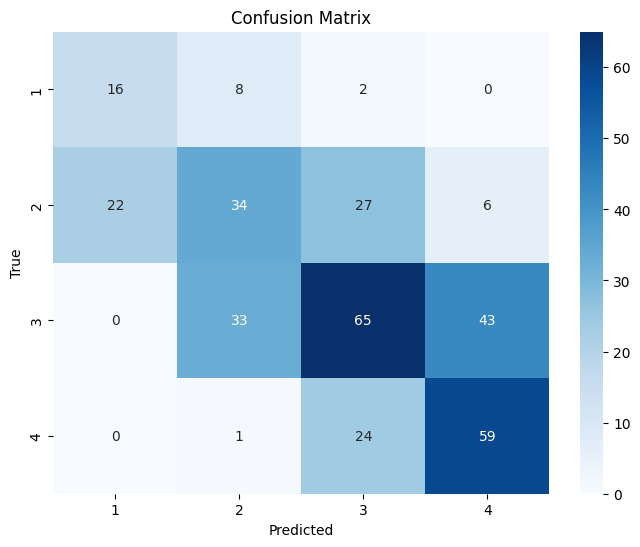

accuracy for class 1: 0.615
accuracy for class 2: 0.382
accuracy for class 3: 0.461
accuracy for class 4: 0.702

Evaluating the model on the train set...
accuracy on train set:  0.6310572687224669
precision on train set:  0.6257029460997265
recall on train set:  0.6310572687224669
f1 score on train set:  0.623982205274075
balanced accuracy on train set:  0.6310572687224669
logistic loss on train set:  0.07993966126795211
mse on train set:  0.5055066079295154

Scorecard table:
          Feature                                             Bin    Points
0       BCE Value        [1.2302975408681887, 1.2315657052205797[ -0.064556
1       BCD Value         [1.582964156040402, 1.5866704265448817[ -0.095334
2      pLBC Value    [0.018406722953068985, 0.018477515740116315[ -0.113526
3      pLBC Value     [0.058514171653683306, 0.05853869032138807[ -0.134199
4      pUNR Value      [0.07388861096220123, 0.07408703881685712[ -0.115906
5      pUNR Value       [0.16866097556192772, 0.168840330209066

In [23]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_beyondl1_model, aesthetic_infbins_diffcod_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Number of observations after SMOTE:  1816
Number of classes after SMOTE:  4
Target distribution after SMOTE:  Subjective Evaluation
Fair         454
Good         454
Excellent    454
Poor         454
Name: count, dtype: int64
testing parameters: {'alpha': 1e-08}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.571596585232949
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.571596585232949
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.571596585232949
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.5660854297217932
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  mean score: 0.0
testing parameters: {'alpha': 0.003593813663804626}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  mean score: 0.0
testing parameters: {'alpha': 0.04641588833612782}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  mean score: 0.0
testing parameters: {'alpha': 0.5994842503189421}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.25000151363787726
testing parameters: {'alpha': 7.742636826811277}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.25000151363787726
testing parameters: {'alpha': 100.0}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.25000151363787726
best parameters:  {'alpha': 1e-08}
best score:  0.571596585232949


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 50981.170378923416 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           1
1             2           2
2             4           2
3             3           3
4             3           2
..          ...         ...
335           3           2
336           3           3
337           4           4
338           4           1
339           4           4

[340 rows x 2 columns]
accuracy:  0.4235294117647059
precision:  0.4364147297889554
recall:  0.4235294117647059
f1 score:  0.42007142536504066
balanced accuracy:  0.4473015778149654
logistic loss:  0.01078368477803945
mse:  0.9264705882352942
number of far off predictions:  23
number of features:  39932
number of non-zero weights:  39932
model size (non-zero weights / all weights):  1.0


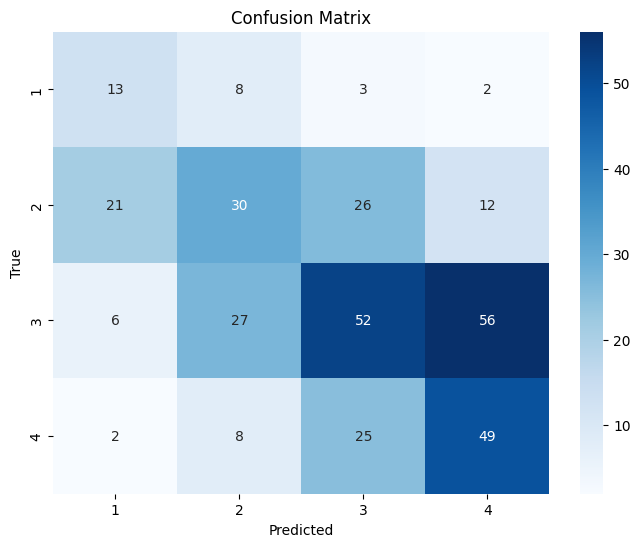

accuracy for class 1: 0.500
accuracy for class 2: 0.337
accuracy for class 3: 0.369
accuracy for class 4: 0.583

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.0828837825402311
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.010037
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.008558
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.008873
3          BRA Value  [0.20882918670067196, 0.21413105126949344[  0.005200
4          BRA Value  [0.21413105126949344, 0.21580389681643153[  0.004888
...              ...                                         ...       ...
39925  cEMDLab Value    [0.7899397543211446, 0.8168139941745478[ -0.000054
39926  cE

In [9]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_adaptivelasso_model, aesthetic_infbins_diffcod_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()